## HUAWEI HACKATHON

In [1]:
import pandas as pd
import numpy as np

### Get Input Data

In [11]:
## Read Data.

label_path = 'Data\\Preprocessed_Data\\train_label\\train_label-formatted.csv'

df_label = pd.read_csv(label_path,header=None)

# Rename columns..
df_label.columns = ['Image_Name',1,2,3,4]

df_label

<IPython.core.display.Javascript object>

,Image_Name,1,2,3,4
0,train_00000.png,1,0,0,0
1,train_00001.png,0,0,0,0
2,train_00002.png,0,0,0,0
3,train_00003.png,0,0,0,0
4,train_00004.png,0,0,0,0
...,...,...,...,...,...
29159,train_29159.png,0,0,0,0
29160,train_29160.png,0,0,0,0
29161,train_29161.png,0,0,0,0
29162,train_29162.png,6,0,0,0


In [12]:
df_label[1].value_counts()

0    25767
6     1719
2      533
4      269
7      255
5      247
3      223
1      151
Name: 1, dtype: int64

## Data Preprocessing

#### OneHot Encode Error Data Error-Type wise..

In [15]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder()
df_encoded = pd.DataFrame(oh_encoder.fit_transform(np.array(df_label.loc[:,1]).reshape(-1, 1)).toarray()).drop(columns=[0]).astype(int)
df_encoded += pd.DataFrame(oh_encoder.transform(np.array(df_label.loc[:,2]).reshape(-1, 1)).toarray()).drop(columns=[0]).astype(int)
df_encoded += pd.DataFrame(oh_encoder.transform(np.array(df_label.loc[:,3]).reshape(-1, 1)).toarray()).drop(columns=[0]).astype(int)
df_encoded += pd.DataFrame(oh_encoder.transform(np.array(df_label.loc[:,4]).reshape(-1, 1)).toarray()).drop(columns=[0]).astype(int)

df_encoded
# oh_encoder.categories_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,1,2,3,4,5,6,7
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
29159,0,0,0,0,0,0,0
29160,0,0,0,0,0,0,0
29161,0,0,0,0,0,0,0
29162,0,0,0,0,0,1,0


In [16]:
# Join with image set..

df_encoded = pd.concat([df_label.iloc[:,0],df_encoded],axis=1)

df_encoded

<IPython.core.display.Javascript object>

,Image_Name,1,2,3,4,5,6,7
0,train_00000.png,1,0,0,0,0,0,0
1,train_00001.png,0,0,0,0,0,0,0
2,train_00002.png,0,0,0,0,0,0,0
3,train_00003.png,0,0,0,0,0,0,0
4,train_00004.png,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
29159,train_29159.png,0,0,0,0,0,0,0
29160,train_29160.png,0,0,0,0,0,0,0
29161,train_29161.png,0,0,0,0,0,0,0
29162,train_29162.png,0,0,0,0,0,1,0


In [17]:
# Save it to a train_label-encoded.csv:
df_encoded.to_csv('Data/Preprocessed_Data/train_label/train_label-encoded.csv',index=False)

In [ ]:
## Run.. Preprocessing--Raw-Data-Files-Segregator.ipynb

## Building a Basic Model..

In [1]:
from numpy.random import seed
from pandas import read_csv, DataFrame
from sklearn.preprocessing import minmax_scale

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow import keras as K

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense,Dropout,Activation
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
import sys

from tensorflow.keras import * 
import tensorflow.keras 
print( tensorflow.keras.__version__)

K.backend.set_image_data_format('channels_last')
##K.set_image_dim_ordering('tf')
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.metrics import categorical_accuracy

import matplotlib.pyplot as plt

2.9.0


In [2]:
# Check if i have a GPU..

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())
# tensorflow.keras
print(tf.config.list_physical_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15884324216996328509
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6245318656
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9591177138983729643
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Super, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
preprocessed_data_path = 'Data\\Preprocessed_Data'

In [4]:
img_width, img_height = 1000, 500


train_data_dir      = preprocessed_data_path+'\\train_images\\'
validation_data_dir = preprocessed_data_path+'\\validation_images\\'

batch_size = 5

In [35]:
import time
start = time.time()

def define_and_compile_model():
    
    tf.keras.backend.clear_session()

    if K.backend.image_data_format() == 'channels_first':
        input_shape = (3, img_width, img_height)
    else:
        input_shape = (img_width, img_height, 3)
        
    mod = Sequential()
    mod.add(BatchNormalization(input_shape=input_shape))
    mod.add(Conv2D(32, (3, 3),activation='relu'))
    mod.add(MaxPooling2D(pool_size=(4, 4)))

    mod.add(BatchNormalization(input_shape=(img_width, img_height, 2)))
    mod.add(Conv2D(64, (3, 3),activation='relu'))
    mod.add(MaxPooling2D(pool_size=(2, 2)))

    mod.add(BatchNormalization(input_shape=input_shape))
    mod.add(Conv2D(128, (3, 3),activation='relu'))
    mod.add(MaxPooling2D(pool_size=(3, 3)))

    # the model so far outputs 3D feature maps (height, width, features)

    mod.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    mod.add(Dense(256, activation='relu'))
    mod.add(Dense(128, activation='relu'))
    mod.add(Dense(32, activation='relu'))
    mod.add(Dropout(0.2))
    mod.add(Dense(8))
    mod.add(Activation('sigmoid'))
    # COMPILE
    mod.compile(loss='categorical_crossentropy',
                optimizer='adam',#tensorflow.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])
    return mod

model = define_and_compile_model()
end = time.time()
print(end - start)

0.20491838455200195


In [18]:
import time
start = time.time()

def define_resnet50_model():
    
    tf.keras.backend.clear_session()

    mod = tf.keras.applications.ResNet50(
        include_top=True,
        weights=None,#'imagenet',
        input_tensor=None,
        input_shape=(img_width, img_height, 3),
        pooling=None,
        classes=8,
        classifier_activation='sigmoid'
    )
    
    mod.compile(loss='categorical_crossentropy',
                optimizer=tensorflow.keras.optimizers.Adam(learning_rate=3e-4),
                metrics=['accuracy'])

    return mod

model = define_resnet50_model()

end = time.time()
print(end - start)

1.9244539737701416


In [19]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000, 500,   0           []                               
                                3)]                                                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 1006, 506, 3  0           ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_conv (Conv2D)            (None, 500, 250, 64  9472        ['conv1_pad[0][0]']              
                                )                                                          

In [ ]:
# Preprocessing:
    # Combine 3 channels into one grayscale image.

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# TODO: Crop the top and botton of image..

# Data Generation Objects..
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    shear_range=0.2,
    #zoom_range=0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    )
test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    shear_range=0.2,
    #zoom_range=0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
    )

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    shuffle=True,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    shuffle=True,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 24438 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


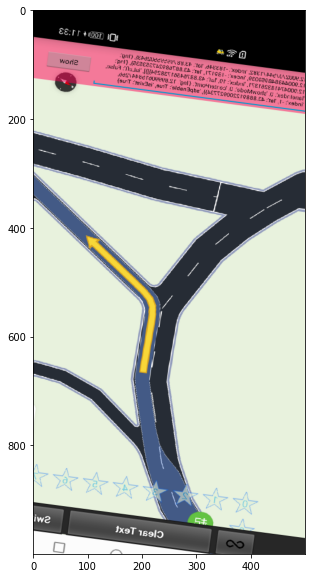

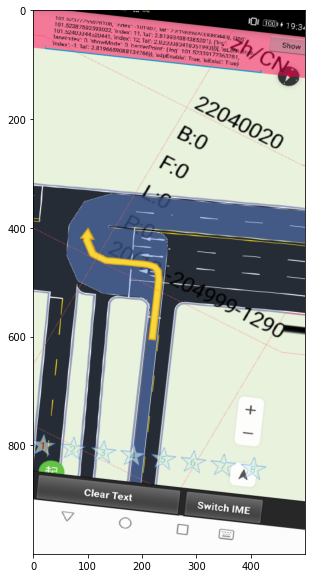

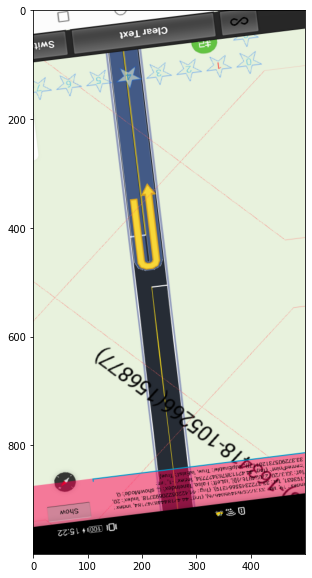

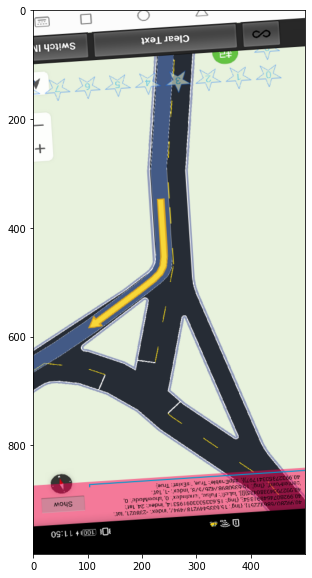

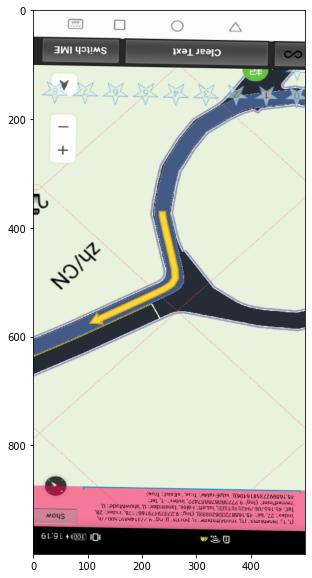

In [21]:


# Sample Some Images from Generator..
for img in train_generator[0][0]:
  plt.figure(figsize=(40,10))
  plt.imshow(img)
  plt.show()

## GLOBAL PARAMS

In [22]:
##########

#CUR_TRAINING_START_EPOCH = 0 # Model_CheckPoint_big_spe1500_e50
CUR_TRAINING_START_EPOCH = 3 # Model_CheckPoint_Resnet_spe2500

##########

#MODEL_CHECKPOINT_NAME = 'Model_CheckPoint_big_spe1500_e50'
MODEL_CHECKPOINT_NAME = 'Model_CheckPoint_Resnet_spe2500'

##########

In [23]:
# Define Callbacks for Early Stopping and Checkpointing..
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import json

CUR_TRAINING_EPOCH = CUR_TRAINING_START_EPOCH
def load_model_history():
    model_history = dict()
    with open(MODEL_CHECKPOINT_NAME+'_history.json', 'r') as f:
        model_history = json.load(f)
    return model_history

# cur_model_history = load_model_history()

cur_model_history = dict()

MODEL_HISTORY_SKIP_COUNT = 10

class GetEpochCallback(K.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch = epoch
        CUR_TRAINING_EPOCH = epoch
        print('Starting Epoch: ',CUR_TRAINING_EPOCH)
        if str(epoch) not in cur_model_history.keys():
            cur_model_history[epoch] = {'accuracy':[],'loss':[],'val_accuracy':[],'val_loss':[]}

    def on_train_batch_end(self, batch, logs=None):
        #print(batch, self.epoch)
        if batch%MODEL_HISTORY_SKIP_COUNT==0:
            cur_model_history[self.epoch]['accuracy'].append(logs["accuracy"])
            cur_model_history[self.epoch]['loss'].append(logs["loss"])
    def on_test_batch_end(self, batch, logs=None):
        #print(logs)
        #print(f'val_loss : {logs["loss"]} - val_accuracy: {logs["accuracy"]}', flush=True)
        # if batch%MODEL_HISTORY_SKIP_COUNT==0:
        cur_model_history[self.epoch]['val_accuracy'].append(logs["accuracy"])
        cur_model_history[self.epoch]['val_loss'].append(logs["loss"])

    def on_epoch_end(self, epoch, logs=None):
        #print(epoch)
        CUR_TRAINING_START_EPOCH = epoch
        self.epoch = epoch
        # Save to file..
        with open(MODEL_CHECKPOINT_NAME+'_history.json', 'w') as f:
            json.dump(cur_model_history, f)


keras_callbacks=[
    EarlyStopping(monitor='val_loss',patience=7,mode='min',min_delta=0.001),#, verbose=2),
    ModelCheckpoint(MODEL_CHECKPOINT_NAME,monitor='val_loss',save_best_only=True),
    GetEpochCallback()
    ]# verbose=2)]



In [24]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [26]:
MODEL_CHECKPOINT_NAME

'Model_CheckPoint_Resnet_spe2500'

In [27]:
model.load_weights(MODEL_CHECKPOINT_NAME)

In [29]:

        #keys = list(logs.keys())
        #print("End epoch {} of training; got log keys: {}".format(epoch, keys))
CUR_TRAINING_START_EPOCH, MODEL_CHECKPOINT_NAME

(3, 'Model_CheckPoint_Resnet_spe2500')

In [30]:
from tabnanny import verbose
import time
start = time.time()

model_history = ''

def fit_resume(starting_epoch):
    global model
    try:
        with tf.device('/device:GPU:0'):
            model_history = model.fit(train_generator,
                                    steps_per_epoch=2500,
                                    initial_epoch=starting_epoch,
                                    epochs=20,
                                    workers=14,
                                    #use_multiprocessing=True,w
                                    validation_data=validation_generator,
                                    callbacks=keras_callbacks)
    except Exception as e: 
        print('Failed! : ',str(e))
        print('Clear Keras and retry..')
        #model = define_and_compile_model()
        # Load Last Backup Weights..
        #model.load_weights(MODEL_CHECKPOINT_NAME)
        #fit_resume(CUR_TRAINING_EPOCH)

fit_resume(CUR_TRAINING_EPOCH)

end = time.time()
print(end - start)

Starting Epoch:  3
Epoch 4/20
 280/2500 [==>...........................] - ETA: 16:54 - loss: 0.4427 - accuracy: 0.9014

KeyboardInterrupt: 

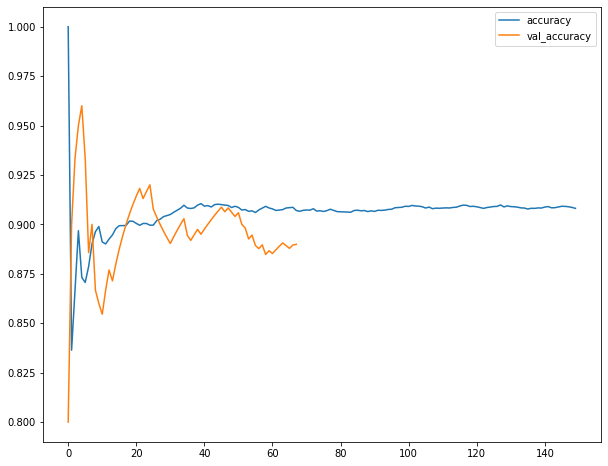

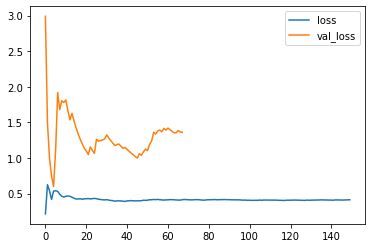

In [62]:
import matplotlib.pyplot as plt

def plot_acc_loss_for_epoch(epoch):
    plt.figure(figsize=(10,8))

    plt.plot(cur_model_history[epoch]['accuracy'], label='accuracy')
    plt.plot(cur_model_history[epoch]['val_accuracy'], label='val_accuracy')
    
    plt.legend()
    plt.show()
    
    plt.plot(cur_model_history[epoch]['loss'],label='loss')
    plt.plot(cur_model_history[epoch]['val_loss'],label='val_loss')
    plt.legend()
    plt.show()

plot_acc_loss_for_epoch(7)

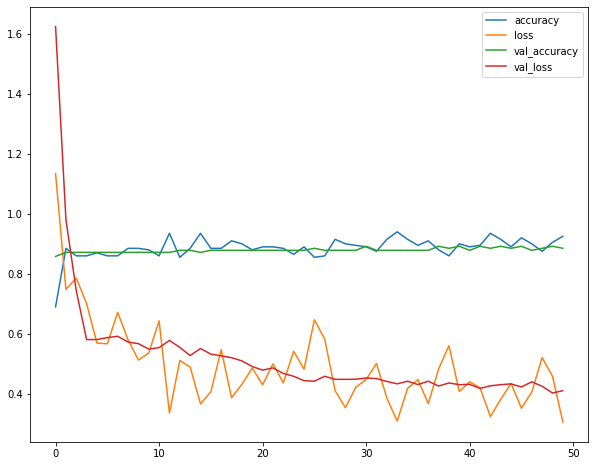

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['loss'],label='loss')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.plot(model_history.history['val_loss'],label='val_loss')
plt.legend()

In [54]:
model.load_weights('Model_CheckPoints')

In [31]:
MODEL_CHECKPOINT_NAME = 'Model_CheckPoint_Resnet_spe2500'
#MODEL_CHECKPOINT_NAME = 'Model_CheckPoint_Resnet_spe1500_e50'
model.load_weights(MODEL_CHECKPOINT_NAME)

model.evaluate(validation_generator)

69/69 [==============================] - 75s 1s/step - loss: 0.4576 - accuracy: 0.9072


[0.4576023817062378, 0.9072463512420654]